In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
src_df = pd.read_csv('diamond.csv')

In [3]:
src_df.shape

(53940, 11)

In [4]:
src_df.drop(columns=['Unnamed: 0'],inplace=True)

### Read, preprocess and print the main statistic about the dataset (your code from Part I can be reused).

In [5]:
src_df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


### Using any data visualization library (e.g. matplotlib, seaborn, plotly), provide at least 5 visualization graphs related to your dataset. You can utilize any columns or a combination of columns in your dataset to generate graphs. E.g. correlation matrix, features vs. the target, counts of categorical features vs. the target.

##### Creating a heat map between the numerical data

<AxesSubplot:>

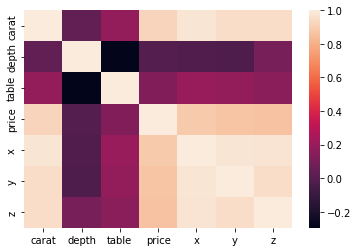

In [6]:
sns.heatmap(src_df.corr(), 
        xticklabels=src_df.corr().columns,
        yticklabels=src_df.corr().columns)

##### Checking the impact of carat on price

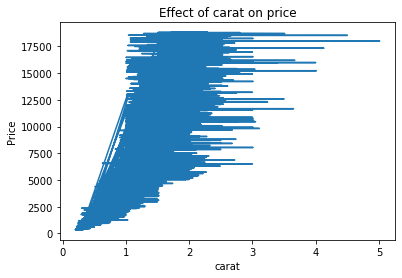

In [7]:
plt.plot(src_df['carat'],src_df['price'])
plt.title('Effect of carat on price')
plt.xlabel('carat')
plt.ylabel('Price')
plt.show()

##### creating a bar graph to count the number of filghts per airline company

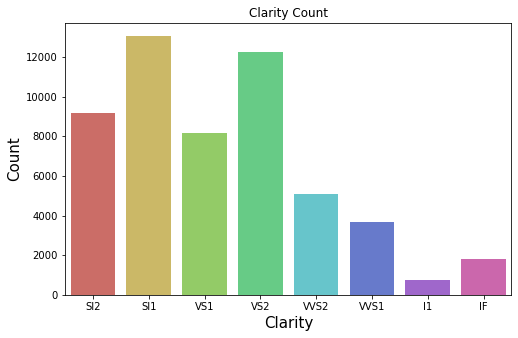

In [8]:
plt.figure(figsize=(8,5))
sns.countplot(x=src_df['clarity'],palette='hls')
plt.title('Clarity Count',fontsize=12)
plt.xlabel('Clarity',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

##### Using pie chart to find the percentage of customers travelling to a destination

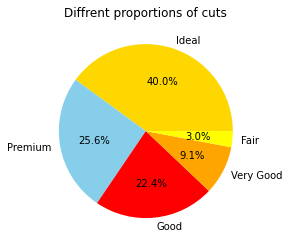

In [9]:
colors = ['gold', 'skyblue', 'red', 'orange','yellow']

plt.pie(src_df['cut'].value_counts(), labels=src_df['cut'].unique(), colors=colors, autopct='%1.1f%%')

plt.title('Diffrent proportions of cuts')
plt.show()

#### Using violin graph to compare the price of the ticket based on cut

<AxesSubplot:xlabel='cut', ylabel='price'>

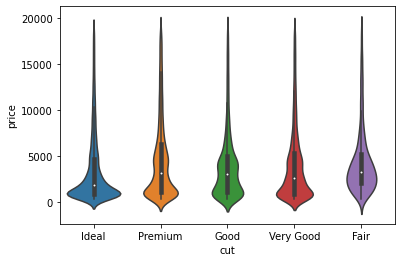

In [10]:
sns.violinplot(x='cut', y='price', data=src_df)

In [11]:
src_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


### Convert features with string datatype to categorical and normalize noncategorical features if needed

In [12]:
cut_conversion = {}
distinct_cut = list(src_df['cut'].sort_values().unique())
for i in distinct_cut:
    cut_conversion[i] = distinct_cut.index(i)
print(cut_conversion)

{'Fair': 0, 'Good': 1, 'Ideal': 2, 'Premium': 3, 'Very Good': 4}


In [13]:
color_conversion = {}
distinct_color = list(src_df['color'].sort_values().unique())
for i in distinct_color:
    color_conversion[i] = distinct_color.index(i)
print(color_conversion)

{'D': 0, 'E': 1, 'F': 2, 'G': 3, 'H': 4, 'I': 5, 'J': 6}


In [14]:
clarity_conversion = {}
distinct_clarity = list(src_df['clarity'].sort_values().unique())
for i in distinct_clarity:
    clarity_conversion[i] = distinct_clarity.index(i)
print(clarity_conversion)

{'I1': 0, 'IF': 1, 'SI1': 2, 'SI2': 3, 'VS1': 4, 'VS2': 5, 'VVS1': 6, 'VVS2': 7}


In [15]:
src_df.replace({'cut' : cut_conversion}, inplace=True)
src_df.replace({'clarity' : clarity_conversion}, inplace=True)
src_df.replace({'color' : color_conversion}, inplace=True)

In [16]:
src_df.corr()

,carat,cut,color,clarity,depth,table,price,x,y,z
carat,1.000000,0.017124,0.291437,-0.214290,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
cut,0.017124,1.000000,0.000304,0.028235,-0.194249,0.150327,0.039860,0.022342,0.027572,0.002037
color,0.291437,0.000304,1.000000,-0.027795,0.047279,0.026465,0.172511,0.270287,0.263584,0.268227
clarity,-0.214290,0.028235,-0.027795,1.000000,-0.053080,-0.088223,-0.071535,-0.225721,-0.217616,-0.224263
depth,0.028224,-0.194249,0.047279,-0.053080,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,0.150327,0.026465,-0.088223,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,0.039860,0.172511,-0.071535,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,0.022342,0.270287,-0.225721,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,0.027572,0.263584,-0.217616,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.002037,0.268227,-0.224263,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


In [17]:
# Dropping depth and table as they does not impact the price much
drop_columns = ['cut','color','clarity','depth','table']
src_df.drop(columns = drop_columns,inplace=True)

In [18]:
src_df = src_df.copy()
  
for column in src_df.columns:
    src_df[column] = src_df[column]  / src_df[column].abs().max()
      
display(src_df)

,carat,price,x,y,z
0,0.045908,0.017319,0.367784,0.067572,0.076415
1,0.041916,0.017319,0.362197,0.065195,0.072642
2,0.045908,0.017372,0.377095,0.069100,0.072642
3,0.057884,0.017744,0.391061,0.071817,0.082704
4,0.061876,0.017797,0.404097,0.073854,0.086478
...,...,...,...,...,...
53935,0.143713,0.146470,0.535382,0.097793,0.110063
53936,0.143713,0.146470,0.529795,0.097623,0.113522
53937,0.139721,0.146470,0.527002,0.096435,0.111950
53938,0.171657,0.146470,0.572626,0.103905,0.117610


### Choose your target Y.
### Create the data matrices for X (input) and Y (target) in a shape X = 𝑁 x 𝑑 and Y = 𝑁 x 1, where 𝑁 is a number of data samples and 𝑑 is a number of features.
### Divide the dataset into training and test, as 80% training, 20% testing dataset.

In [19]:
msk = np.random.rand(len(src_df)) < 0.8

train = src_df[msk]
test = src_df[~msk]

In [20]:
x_train,y_train,x_test,y_test = train.drop('price',axis=1),train['price'],test.drop('price',axis=1),test['price']

In [21]:
print(x_train.shape)
print(y_train.shape)

(43284, 4)
(43284,)


### Print the shape of your X_train, y_train, X_test, y_test.

In [22]:
print(x_test.shape)
print(y_test.shape)

(10656, 4)
(10656,)


In [23]:
x_test

,carat,x,y,z
0,0.045908,0.367784,0.067572,0.076415
14,0.039920,0.352886,0.063667,0.071384
26,0.047904,0.369646,0.066893,0.077673
29,0.045908,0.368715,0.067742,0.076101
36,0.045908,0.356611,0.065365,0.077358
...,...,...,...,...
53918,0.151697,0.552142,0.099321,0.109748
53920,0.139721,0.518622,0.095246,0.109748
53927,0.157685,0.564246,0.104075,0.111321
53932,0.139721,0.531657,0.097793,0.109119


### Linear Regression

In [24]:
class LinRegression:
    def __init__(self):
        self.weights = None
    
    def fit(self,X,y):
        XT_X = X.T @ X
        self.weights = np.linalg.inv(X.T @ X) @ X.T @ y
    
    def predict(self,X):
        return X @ self.weights.to_numpy()

In [25]:
linreg = LinRegression()

In [26]:
linreg.fit(x_train,y_train)

In [27]:
y_pred_linear = linreg.predict(x_test)

### Mean Square Error

In [28]:
Linear_MSE = np.mean((y_test-y_pred_linear)**2)
print(Linear_MSE)

0.0067527169377345425


In [29]:
linreg.weights

0    2.434349
1   -0.550315
2    1.962669
3   -0.686875
dtype: float64

In [30]:
pickle.dump(linreg.weights,open( "saitejad_vvudhaya_assignment1_part2.pickle", "wb" ))

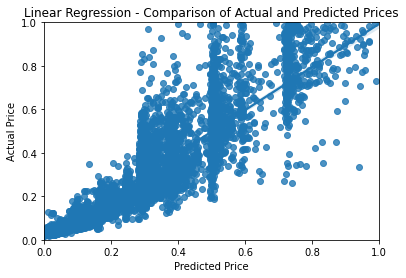

In [31]:
sns.regplot(x=y_pred_linear, y=y_test);
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression - Comparison of Actual and Predicted Prices')
plt.show()

### Ridge Regression

In [32]:
class RidgRegression:
    def __init__(self, lambda_val):
        self.lambda_val = lambda_val
    
    def fit(self,X,y):
        n, p = X.shape
        I = np.eye(p)
        self.weights = np.linalg.inv(X.T @ X + self.lambda_val*I) @ X.T @ y
    
    def predict(self,X):
        return X @ self.weights.to_numpy()

In [33]:
alpha = 0.1
ridgreg = RidgRegression(alpha)

In [34]:
ridgreg.fit(x_train,y_train)

In [35]:
y_pred_ridge = ridgreg.predict(x_test)

In [36]:
ridgreg.weights

0    2.431375
1   -0.451947
2    1.361170
3   -0.627995
dtype: float64

In [37]:
pickle.dump(ridgreg.weights,open( "saitejad_vvudhaya_assignment1_part3.pickle", "wb" ))

### Squared loss

In [38]:
Ridge_MSE = np.mean((y_test-y_pred_linear)**2)
print(Ridge_MSE)

0.0067527169377345425


In [39]:
Ridge_MSE = np.mean((y_test-y_pred_linear)**2)
penalty = alpha * np.dot(ridgreg.weights.T,ridgreg.weights)
Sqrd_loss = Ridge_MSE + penalty
print(Sqrd_loss)

0.8430526280732467


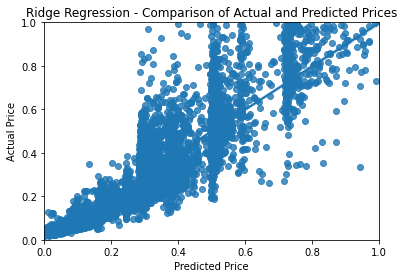

In [40]:
sns.regplot(x=y_pred_ridge, y=y_test);
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Ridge Regression - Comparison of Actual and Predicted Prices')
plt.show()